In [240]:
import numpy as np 
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [241]:
data = pd.read_csv('StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [242]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [243]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [244]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [245]:
data.duplicated().sum()

0

In [246]:
data.rename(columns={'lunch':'Income_tested'},inplace=True)
data.rename(columns={'race/ethnicity':'Race'},inplace=True)
data.rename(columns={'parental level of education':'parent_education'},inplace=True)

In [247]:
data.head()

,gender,Race,parent_education,Income_tested,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


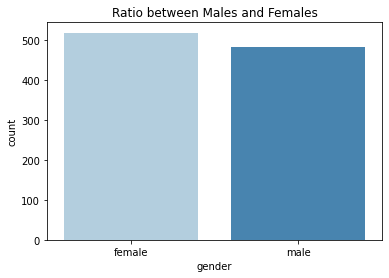

In [290]:
sns.countplot(data=data,x='gender',palette='Blues')
plt.title('Ratio between Males and Females');

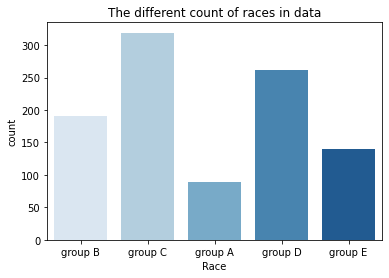

In [281]:
sns.countplot(data=data,x='Race',palette='Blues');
plt.title('The different count of races in data');

In [250]:
score = np.sum(data[['math score','reading score','writing score']],axis=1)
average_score = score/3

In [251]:
data['Avg_score']=average_score

In [252]:
data.head()

,gender,Race,parent_education,Income_tested,test preparation course,math score,reading score,writing score,Avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [253]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   1000 non-null   object 
 1   Race                     1000 non-null   object 
 2   parent_education         1000 non-null   object 
 3   Income_tested            1000 non-null   object 
 4   test preparation course  1000 non-null   object 
 5   math score               1000 non-null   int64  
 6   reading score            1000 non-null   int64  
 7   writing score            1000 non-null   int64  
 8   Avg_score                1000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


In [254]:
data['Avg_score']= data['Avg_score'].astype('int64')

In [255]:
data.head()

,gender,Race,parent_education,Income_tested,test preparation course,math score,reading score,writing score,Avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72
1,female,group C,some college,standard,completed,69,90,88,82
2,female,group B,master's degree,standard,none,90,95,93,92
3,male,group A,associate's degree,free/reduced,none,47,57,44,49
4,male,group C,some college,standard,none,76,78,75,76


In [256]:
average_score= (data['Avg_score']/100)*100

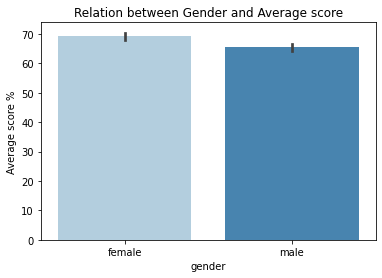

In [257]:
sns.categorical.barplot(data=data,x='gender',y=average_score,palette='Blues');
plt.title('Relation between Gender and Average score');
plt.ylabel('Average score %');

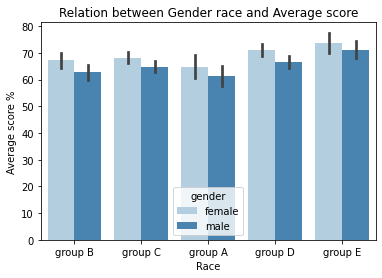

In [258]:
sns.categorical.barplot(data=data,x='Race',y=average_score,hue='gender',palette='Blues');
plt.title('Relation between Gender race and Average score');
plt.ylabel('Average score %');

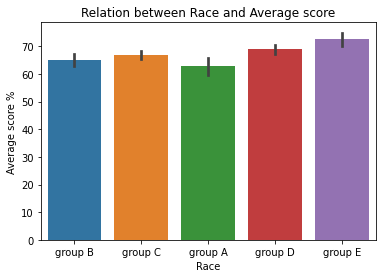

In [259]:
sns.categorical.barplot(data=data,x='Race',y=average_score);
plt.title('Relation between Race and Average score');
plt.ylabel('Average score %');

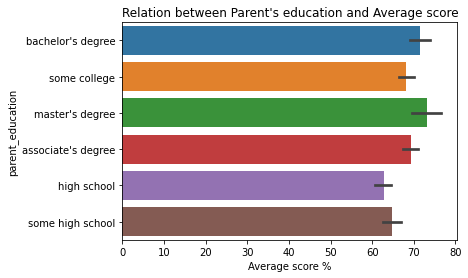

In [260]:
sns.categorical.barplot(data=data,y='parent_education',x=average_score);
plt.title('Relation between Parent\'s education and Average score')
plt.xlabel('Average score %');

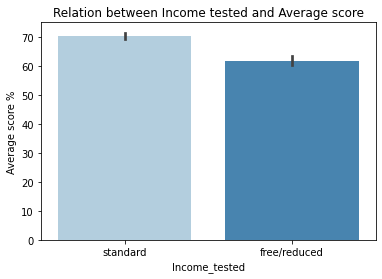

In [261]:
sns.categorical.barplot(data=data,x='Income_tested',y=average_score,palette='Blues');
plt.title('Relation between Income tested and Average score');
plt.ylabel('Average score %');

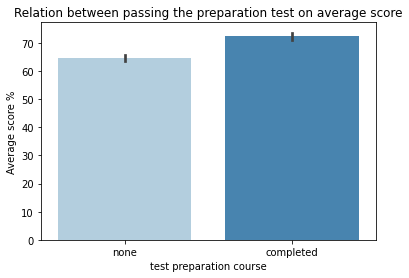

In [262]:
sns.categorical.barplot(data=data,x='test preparation course',y=average_score,palette='Blues');
plt.title('Relation between passing the preparation test on average score');
plt.ylabel('Average score %');

In [263]:
data['test preparation course'].replace(['none','completed'],[0,1],inplace=True)

In [264]:
data.head()

,gender,Race,parent_education,Income_tested,test preparation course,math score,reading score,writing score,Avg_score
0,female,group B,bachelor's degree,standard,0,72,72,74,72
1,female,group C,some college,standard,1,69,90,88,82
2,female,group B,master's degree,standard,0,90,95,93,92
3,male,group A,associate's degree,free/reduced,0,47,57,44,49
4,male,group C,some college,standard,0,76,78,75,76


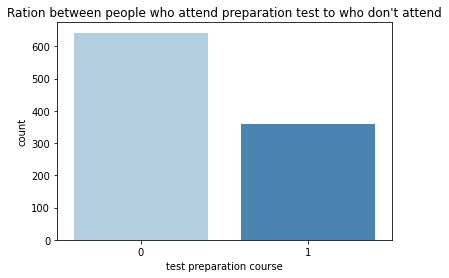

In [267]:
sns.countplot(data=data,x='test preparation course',palette = 'Blues');
plt.title('Ration between people who attend preparation test to who don\'t attend');

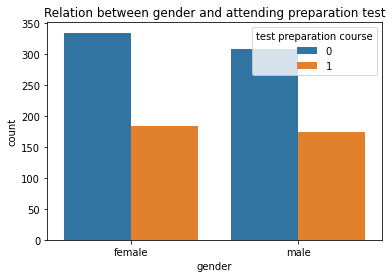

In [268]:
sns.countplot(data=data,x='gender',hue='test preparation course');
plt.title('Relation between gender and attending preparation test');

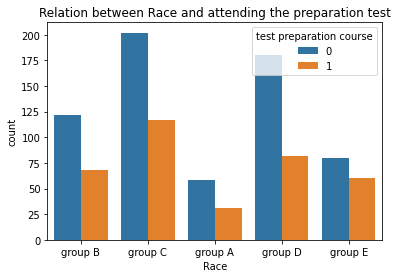

In [274]:
sns.countplot(data=data,x='Race',hue='test preparation course');
plt.title('Relation between Race and attending the preparation test');

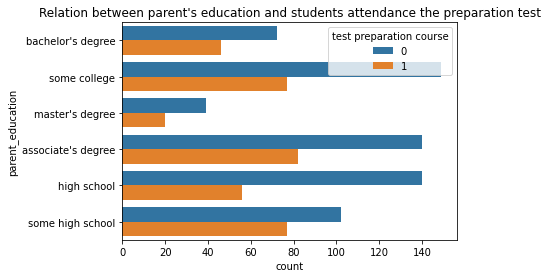

In [273]:
sns.countplot(data=data,y='parent_education',hue='test preparation course');
plt.title('Relation between parent\'s education and students attendance the preparation test');

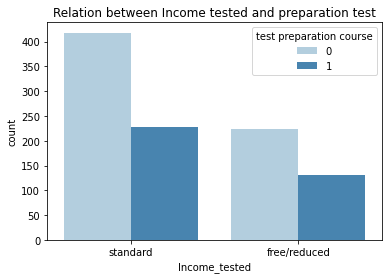

In [275]:
sns.countplot(data=data,x='Income_tested',hue='test preparation course',palette='Blues');
plt.title('Relation between Income tested and preparation test');